## Import needed libraries

In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the CSV file

In [51]:
df = pd.read_csv("loan.csv")

/tmp/ipykernel_254544/2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [52]:
# Understand the warning and avoid to loose data.
# Get the 47 th Column name and get unique
column_name_47 = df.columns[46]
print("Column 47 name:", column_name_47)

Column 47 name: last_pymnt_amnt


In [53]:
# Get the values in the column
df['last_pymnt_amnt'].unique()

array([171.62, 119.66, 649.91, ...,  80.9 , 281.94, 256.59])

In [54]:
# Reload the csv file with out any warning
df = pd.read_csv("loan.csv", dtype={'last_pymnt_amnt': 'str'}, low_memory=False)

In [55]:
#Print all the columns
cols = df.columns
print(list(cols))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [56]:
for col in df.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

## Date cleanup

### To analyse further we need to confirm below columns should have correct values.
### Check for any repeatation, NULL or corrupted values
##### id: Unique identifier for each loan record.
##### loan_amnt: Amount of the loan, critical for assessing the size of defaults.
##### loan_status: Indicates whether the loan is current, charged off, or in default, essential for your analysis.
##### int_rate: Interest rate, which can influence borrower behavior and default likelihood.
##### annual_inc: Borrower's annual income, important for assessing repayment capacity.
##### dti: Debt-to-income ratio, a key metric in evaluating the borrower's financial health.
##### delinq_2yrs: Number of delinquencies in the past 2 years, indicating credit risk.
##### home_ownership: Helps understand the borrower's stability, which can affect defaults.
##### grade and sub_grade: Credit grades that can provide insights into borrower risk profiles.
##### emp_length: Employment length can correlate with borrower stability.
##### verification_status: Status of income verification, which can impact lending risk.
##### issue_d: Loan issuance date, useful for time-based analysis of defaults
#### total_pymnt	Payments received to date for total amount funded


In [57]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [58]:
df.shape

(39717, 111)

In [59]:
# Check for any repeatation of the data with unique ID
print ("unique id ", len(df['id'].unique()))
print("Total loan transcation ", len(df['id']))
print("Check for any null values", df['id'].isnull().sum())

unique id  39717
Total loan transcation  39717
Check for any null values 0


In [60]:
# Check for any repeatation of the data with member_id 
print ("unique id ", len(df['member_id'].unique()))
print("Total loan transcation ", len(df['member_id']))
print("Check for any null values", df['member_id'].isnull().sum())

unique id  39717
Total loan transcation  39717
Check for any null values 0


In [61]:
# loan_amnt
# Check for loan amount beling zero
print("Empty loan amt", df['loan_amnt'].isnull().sum())

print("Check different loan amts given", df['loan_amnt'].value_counts())


Empty loan amt 0
Check different loan amts given loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64


In [62]:
print("Different loan status", df['loan_status'].value_counts())
print("\n\nEmpy loan status ", df['loan_status'].isnull().sum())

print("\n\nunique loan status", df['loan_status'].unique())

Different loan status loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


Empy loan status  0


unique loan status ['Fully Paid' 'Charged Off' 'Current']


In [63]:
# Let us perform the isnull on all the needed columns at one shot
df1 = df

# Check the columns which are null and also I want to exclude columns which dont have any value in the column.
for col in cols:
    null_count = df[col].isnull().sum()
    null_percetnage = round((null_count/len(df['id'])) * 100, 2)
    if(null_count != 0 and null_count != len(df['id'])):
        print(f"Column '{col}' = {null_count} 'perctage : ' {null_percetnage}")

Column 'emp_title' = 2459 'perctage : ' 6.19
Column 'emp_length' = 1075 'perctage : ' 2.71
Column 'desc' = 12942 'perctage : ' 32.59
Column 'title' = 11 'perctage : ' 0.03
Column 'mths_since_last_delinq' = 25682 'perctage : ' 64.66
Column 'mths_since_last_record' = 36931 'perctage : ' 92.99
Column 'revol_util' = 50 'perctage : ' 0.13
Column 'last_pymnt_d' = 71 'perctage : ' 0.18
Column 'next_pymnt_d' = 38577 'perctage : ' 97.13
Column 'last_credit_pull_d' = 2 'perctage : ' 0.01
Column 'collections_12_mths_ex_med' = 56 'perctage : ' 0.14
Column 'chargeoff_within_12_mths' = 56 'perctage : ' 0.14
Column 'pub_rec_bankruptcies' = 697 'perctage : ' 1.75
Column 'tax_liens' = 39 'perctage : ' 0.1


In [64]:
# lets analyse the not null data from above list.

In [65]:
print(df['emp_title'].unique())
print(df['emp_title'].value_counts())

[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']
emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64


In [66]:
# Percentage of the 'emp_title' is null
len(df1[df1['emp_title'].isnull()])/len(df1['id'])*100

6.191303472064859

In [67]:
df_emp_null_defaults = df1[(df1['emp_title'].isnull()) & (df1['loan_status'].isin(['Charged Off']))]
len(df_emp_null_defaults)/len(df1['emp_title'].isnull())*100

1.2186217488732785

In [68]:
# Since not having employment data is important for us to take decission.
# Dont remove the rows, better fill with other place holder
df1['emp_title'] = df1['emp_title'].fillna('No_emp_info')


In [69]:
df_default_emp_length = df1[df1['emp_length'].isnull() & (df1['loan_status'].isin(['Charged Off'])) & (df1['emp_title'].isin(['No_emp_info']))]
len(df_default_emp_length)


216

In [70]:
df1['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [71]:
# Looking at the term in month, let us convert it to intiger
df['term'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [72]:
df1['emp_length'] = df1['emp_length'].fillna('No_emp_length')

In [73]:
# mths_since_last_delinq and mths_since_last_record records mostly missing fillinf them can impact our analysis heavily
# Still check them to understand
df1['mths_since_last_delinq'].value_counts()
#df1['mths_since_last_delinq'].mode()[0]
df1['mths_since_last_delinq'] = df1['mths_since_last_delinq'].fillna(df1['mths_since_last_delinq'].mode()[0])
df1['mths_since_last_delinq'].isnull().sum()

0

In [74]:
df1['mths_since_last_record'].value_counts()
df1['mths_since_last_record'] = df1['mths_since_last_record'].fillna(df1['mths_since_last_record'].mode()[0])

In [75]:
# Updating to p50 to fill the nulls
df1['revol_util'] = df1['revol_util'].apply(lambda x: float(str(x).rstrip('%')))
df1['revol_util'] =  df1['revol_util'].fillna(df1['revol_util'].quantile(0.5))

In [76]:
# fill null values of last payment date with mostly occured 
df1['last_pymnt_d'] = df1['last_pymnt_d'].fillna(df1['last_pymnt_d'].mode()[0]) 

In [77]:
df1['chargeoff_within_12_mths'].value_counts() + df1['chargeoff_within_12_mths'].isnull().sum()
df1['chargeoff_within_12_mths'] = df1['chargeoff_within_12_mths'].fillna(df1['chargeoff_within_12_mths'].mode()[0])
df1['chargeoff_within_12_mths'].value_counts()

chargeoff_within_12_mths
0.0    39717
Name: count, dtype: int64

In [78]:
df1['collections_12_mths_ex_med'].value_counts()
df1['collections_12_mths_ex_med'].isnull().sum()

df1['collections_12_mths_ex_med'] = df1['collections_12_mths_ex_med'].fillna(df1['collections_12_mths_ex_med'].mode()[0])

In [79]:
df1['last_credit_pull_d'] = df1['last_credit_pull_d'].fillna(df1['last_credit_pull_d'].mode()[0])

In [80]:
df1['pub_rec_bankruptcies'].value_counts()
df1['pub_rec_bankruptcies'] = df1['pub_rec_bankruptcies'].fillna(df1['pub_rec_bankruptcies'].mode()[0]) 

In [81]:
df1['tax_liens'].value_counts()
df1['tax_liens'] = df1['tax_liens'].fillna(df1['tax_liens'].mode()[0])

In [82]:
# ignore this
df1[df1['next_pymnt_d'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [83]:
df['term'].value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [84]:
df1['term'] = df['term'].apply(lambda x: int(str(x).replace(' months', '')))

In [85]:
df1['term'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


In [86]:
#Remove perentage in int_rate
df1['int_rate'] = df1['int_rate'].apply(lambda x: str(x).rstrip('%'))
df1['int_rate'] = df1['int_rate'].apply(lambda x: float(x))
df1['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


### Check the data after cleanup and check for anything missing

In [87]:
# Check the columns which are null and also I want to exclude columns which dont have any value in the column.
for col in cols:
    null_count = df[col].isnull().sum()
    null_percetnage = round((null_count/len(df['id'])) * 100, 2)
    if(null_count != 0 and null_count != len(df['id'])):
        print(f"Column '{col}' = {null_count} 'perctage : ' {null_percetnage}")

Column 'desc' = 12942 'perctage : ' 32.59
Column 'title' = 11 'perctage : ' 0.03
Column 'next_pymnt_d' = 38577 'perctage : ' 97.13


In [88]:
print(df1.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [89]:
# percentage of null values
null_value_percent = round(100*(df.isnull().sum()/len(df.index)), 2)

null_value_percent[null_value_percent > 60]

next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24mths              100.00
avg_cur_bal                       100.00
bc_open_to_buy  

In [90]:
# Dropping all columns with more than 60% null values
df.drop(null_value_percent[ null_value_percent == 100 ].index, axis=1, inplace=True)

In [118]:
df.shape

(39717, 51)

In [117]:
# find number of unique value in each column
df.nunique().sort_values()
df.nunique()[df.nunique()==1]
df.drop(df.nunique()[df.nunique()==1].index, axis=1, inplace=True)


In [121]:
df.shape


(39717, 51)

In [122]:
df1=df
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,expected_return,not_paid_amt,total_pymnt1
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,5863.32,0.16,5863.155187
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,3589.80,2581.09,1008.710000
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,3035.88,30.21,3005.666844
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,12215.16,-16.73,12231.890000
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,4067.40,554.07,3513.330000


### ---------------------------------
### Data looks fine with all the needed values filled and we can go ahead for univariate analysis
### ---------------------------------

In [123]:
# Understand the current buisness profti/loss

# total funded amount
total_funded = df1['funded_amnt'].sum()

# total amount which firm will get in return, add it as new column
df1['expected_return'] = df1['installment'] * df1['term'] 

# Calculate the total amount repaid
total_repaid = df1['total_pymnt'].sum()

print(f"Total Amount Funded: {total_funded}")
print(f"Total Amount Repaid: {total_repaid}")
print(f"Total Amount expected: {df1['expected_return'].sum()}")

Total Amount Funded: 434810325
Total Amount Repaid: 482704394.30999994
Total Amount expected: 555780868.56


In [124]:
# Add one more column for the diff between expected repayment and repaid in defaults

df1['not_paid_amt'] = df1['expected_return'] - df1['total_pymnt']
df1['total_pymnt1'] = df1['total_pymnt']

In [125]:
df1['not_paid_amt'] = df1['not_paid_amt'].round(2)
df1['total_pymnt'] = df1['total_pymnt'].round(2)
df1['expected_return'] = df1['expected_return'].round(2)

In [126]:
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,expected_return,not_paid_amt,total_pymnt1
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,5863.32,0.16,5863.16
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,3589.80,2581.09,1008.71
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,3035.88,30.21,3005.67
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,12215.16,-16.73,12231.89
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,4067.40,554.07,3513.33


In [127]:
# Lets filter the cols to understand better
defaulted_loans = df1[df1['loan_status'] == 'Charged Off']
defaulted_loans.sort_values('not_paid_amt', ascending=False)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,expected_return,not_paid_amt,total_pymnt1
15765,741779,939768,35000,35000,34460.110000,60,19.29,913.52,E,E4,...,0.00,0.0000,Jul-11,913.52,NaN,May-16,0.0,54811.20,52985.52,1825.68
3803,1012281,1239399,35000,35000,34749.996090,60,22.06,967.86,F,F4,...,0.00,0.0000,Aug-12,1473.44,NaN,May-16,0.0,58071.60,51761.57,6310.03
10444,832490,1041891,35000,35000,35000.000000,60,21.36,953.97,F,F4,...,0.00,0.0000,Feb-12,953.97,NaN,May-16,0.0,57238.20,51516.90,5721.30
9357,850713,1062556,35000,35000,34975.000000,60,20.25,932.17,F,F1,...,1951.32,18.8900,May-12,350,NaN,Sep-12,0.0,55930.20,50486.09,5444.11
3006,1019978,1248729,35000,35000,34788.447070,60,23.52,997.16,G,G3,...,1857.55,18.2200,Aug-12,997.16,NaN,Dec-12,0.0,59829.60,50000.77,9828.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24665,590769,758818,12000,12000,11875.000000,36,7.88,375.38,A,A5,...,8595.09,1516.8300,Mar-12,301.23,NaN,May-16,0.0,13513.68,-258.90,13772.58
37997,366887,379786,20000,6100,2600.000000,36,11.26,200.47,B,B2,...,4308.61,822.9041,May-10,200.47,NaN,May-16,0.0,7216.92,-311.89,7528.81
1329,1052469,1284000,20000,20000,20000.000000,36,17.27,715.75,D,D3,...,311.89,56.1402,Jul-15,715.75,NaN,May-16,0.0,25767.00,-382.35,26149.35
39341,224381,223623,25000,25000,1750.005358,36,16.15,880.78,F,F3,...,10084.39,1367.7608,Jul-10,880.88,NaN,Nov-10,0.0,31708.08,-533.08,32241.16


In [128]:
df1[df1['expected_return'] < df1['total_pymnt']].sort_values('not_paid_amt')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,expected_return,not_paid_amt,total_pymnt1
31738,491622,628322,25000,25000,24975.000000,36,16.07,879.85,D,D5,...,0.00,0.0000,Feb-15,7912.97,NaN,Dec-15,0.0,31674.60,-6405.21,38079.81
33013,474632,600473,25000,25000,22668.043560,36,16.00,878.94,D,D5,...,0.00,0.0000,Oct-15,1639.57,NaN,Oct-15,0.0,31641.84,-4014.83,35656.67
39213,242356,242065,19200,19200,2250.000000,36,13.87,655.00,D,D5,...,0.00,0.0000,Dec-11,5490.51,NaN,Apr-16,0.0,23580.00,-2606.86,26186.86
35500,434797,518223,18000,18000,17293.766850,36,12.18,599.40,B,B4,...,5989.52,950.8695,Nov-13,382.64,NaN,May-16,0.0,21578.40,-2563.77,24142.17
16951,723608,918617,17500,17500,17475.000000,60,16.40,372.49,E,E1,...,0.00,0.0000,Dec-15,1820.76,NaN,May-16,0.0,22349.40,-2348.14,24697.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31292,497037,637076,6000,6000,6000.000000,36,7.88,187.69,A,A5,...,0.00,0.0000,Apr-13,194.28,NaN,Nov-15,0.0,6756.84,-0.01,6756.85
25883,577870,743052,3000,3000,3000.000000,36,13.98,102.51,C,C3,...,0.00,0.0000,Sep-13,108.59,NaN,Sep-13,0.0,3690.36,-0.01,3690.37
22860,622449,786187,10400,10400,9956.626857,36,6.91,320.70,A,A5,...,0.00,0.0000,Dec-13,328.35,NaN,Jun-15,0.0,11545.20,-0.01,11545.21
31948,488731,623406,10000,10000,10000.000000,36,11.36,329.12,B,B5,...,0.00,0.0000,Mar-13,336.7,NaN,Mar-13,0.0,11848.32,-0.01,11848.33


In [130]:
# Percentage of the paid amount returned than expected
len(df1[df1['expected_return'] < df1['total_pymnt']])/len(df1.index) * 100


11.43087342951381

In [100]:
df1[(df1['not_paid_amt'] < 0) & df1['loan_status'] == 'Charged Off']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,expected_return,not_paid_amt,total_pymnt1


In [101]:
df_overpaid = df1[df1['not_paid_amt'] < 0]
df_overpaid['loan_status'].value_counts()
#df1[(df1['not_paid_amt'] < 0)]

loan_status
Fully Paid     4518
Charged Off      20
Current           2
Name: count, dtype: int64

In [102]:
df_charged_off = df1[(df1['not_paid_amt'] < 0) & (df1['loan_status'] == 'Charged Off')]
display(df_charged_off)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,expected_return,not_paid_amt,total_pymnt1
1329,1052469,1284000,20000,20000,20000.000000,36,17.27,715.75,D,D3,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,25767.00,-382.35,26149.350000
8307,867780,1081409,4500,4500,4500.000000,36,8.49,142.04,A,A5,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,5113.44,-14.30,5127.740000
14724,761566,962036,13750,13750,13750.000000,60,19.69,361.93,E,E5,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,21715.80,-32.89,21748.690000
18119,704507,896524,12375,12375,11816.267120,36,10.37,401.46,B,B3,...,1,INDIVIDUAL,0,0.0,0,1.0,0.0,14452.56,-187.69,14640.250000
23228,616966,791031,14600,14600,13516.238680,36,12.61,489.20,C,C2,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,17611.20,-224.00,17835.200000
24665,590769,758818,12000,12000,11875.000000,36,7.88,375.38,A,A5,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,13513.68,-258.90,13772.580000
26985,560150,720996,25000,25000,24975.000000,60,13.61,576.67,C,C2,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,34600.20,-165.15,34765.350000
27969,545408,703433,3600,3600,3568.466076,36,13.98,123.01,C,C3,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,4428.36,-19.00,4447.360000
30066,514233,664663,2500,2500,2425.000000,36,13.11,84.37,C,C2,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,3037.32,-28.63,3065.950000
34755,446879,546916,2500,2500,2500.000000,36,11.14,82.01,B,B1,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2952.36,-219.45,3171.810000


In [103]:
df_curent = df1[(df1['not_paid_amt'] < 0) & (df1['loan_status'] == 'Current')]
display(df_curent)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,expected_return,not_paid_amt,total_pymnt1
15618,745718,944338,6400,6400,6400.0,60,6.0,132.64,E,E3,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,7958.4,-655.41,8613.81
15972,725556,920821,10400,10400,10400.0,60,6.0,218.99,E,E3,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,13139.4,-747.52,13886.92


### Conlsusion: Exclude these rows where not_paid_amt is negative.

In [131]:
df1.shape

(39717, 51)

In [132]:
df1 = df1[(df1['not_paid_amt'] >= 0)]

In [133]:
df1.shape

(35177, 51)

In [134]:
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,expected_return,not_paid_amt,total_pymnt1
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,5863.32,0.16,5863.16
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,3589.80,2581.09,1008.71
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,3035.88,30.21,3005.67
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,4067.40,554.07,3513.33
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0,5632.56,0.35,5632.21


### Univariate analysis of loan_amount

In [286]:
df1['loan_amnt'].describe()

count    35177.000000
mean     11331.382722
std       7584.343059
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

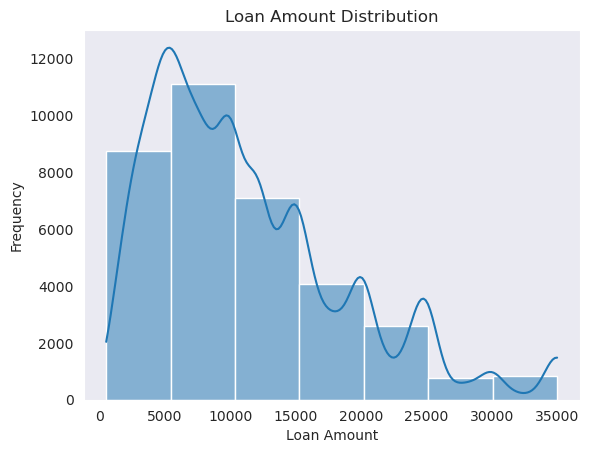

In [313]:
sns.histplot(df1['loan_amnt'], bins=7, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

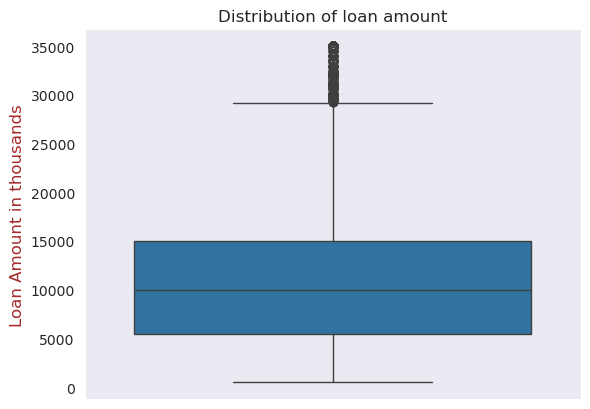

In [290]:
sns.boxplot(df1['loan_amnt'])
plt.title("Distribution of loan amount", fontsize=12)
#plt.xlabel("", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'}) 
plt.ylabel("Loan Amount in thousands", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )
plt.show()

In [365]:
# Find the outliers and understand the loan amt
p25 = df1['loan_amnt'].quantile(0.25)
p75 = df1['loan_amnt'].quantile(0.75)

IQR = p75 - p25
lower_range = p25 - IQR * 1.5
higher_range = p25 + IQR * 1.5

print(p25)
print(p75)
print(IQR)
print(lower_range)
print(higher_range)

5500.0
15000.0
9500.0
-8750.0
19750.0


In [299]:
outliers = df1[(df1['loan_amnt'] > higher_range) |  (df1['loan_amnt'] < lower_range)]
outliers['loan_status'].value_counts()

loan_status
Fully Paid     4162
Charged Off    1088
Current         433
Name: count, dtype: int64

In [139]:
# Date Format

df1.issue_d=pd.to_datetime(df1.issue_d,format='%b-%y')
df1['issue_year']=pd.to_datetime(df1.issue_d,format='%b-%y').dt.year
df1['issue_month']=pd.to_datetime(df1.issue_d,format='%b-%y').dt.month
df1['issue_weekday']=pd.to_datetime(df1.issue_d,format='%b-%y').dt.weekday

/tmp/ipykernel_254544/2990449785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.issue_d=pd.to_datetime(df1.issue_d,format='%b-%y')
/tmp/ipykernel_254544/2990449785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['issue_year']=pd.to_datetime(df1.issue_d,format='%b-%y').dt.year
/tmp/ipykernel_254544/2990449785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Text(0.5, 1.0, 'Month wise Distribution')

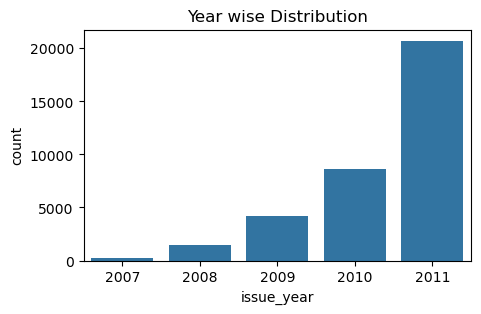

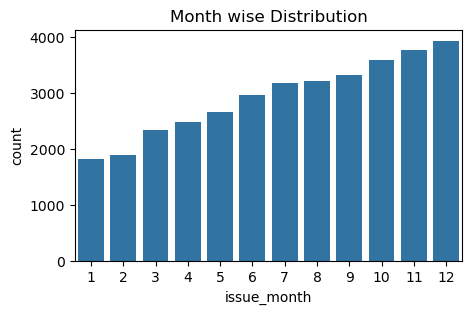

In [140]:
# Loan Issue Time

plt.figure(figsize=(5,3))
sns.countplot(x ='issue_year', data = df1)
plt.title('Year wise Distribution')

plt.figure(figsize=(5,3))
sns.countplot(x ='issue_month', data = df1)
plt.title('Month wise Distribution')

Text(0.5, 0, 'Loan Status')

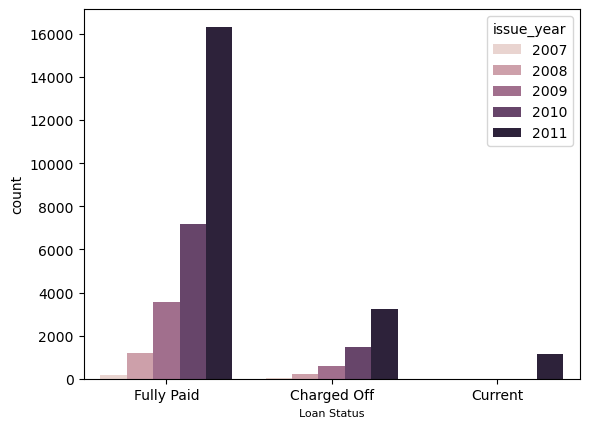

In [141]:
# Year wise Loan Status Distribution 

sns.countplot(data=df1,x='loan_status',hue='issue_year')
plt.xlabel('Loan Status',fontsize=8)

In [ ]:
#Purpose Of Loan

plt.figure(figsize=(6,5))
sns.countplot(y ='purpose', data = df)


#Loan Defaulter - Loan Purpose

plt.figure(figsize=(6,5))
sns.countplot(y ='purpose', data = df[df.loan_status == 'Charged Off'])
plt.ylabel('Purpose (defaulters)')

In [143]:
purpose_status = pd.pivot_table(data=df1, values="loan_amnt", index="purpose", columns="loan_status", aggfunc='count')
purpose_status

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,159.0,50.0,1208.0
credit_card,540.0,102.0,3852.0
debt_consolidation,2758.0,585.0,13241.0
educational,55.0,NaN,221.0
home_improvement,346.0,101.0,2213.0
house,59.0,14.0,280.0
major_purchase,221.0,37.0,1650.0
medical,104.0,12.0,493.0
moving,92.0,7.0,404.0


<Axes: xlabel='purpose'>

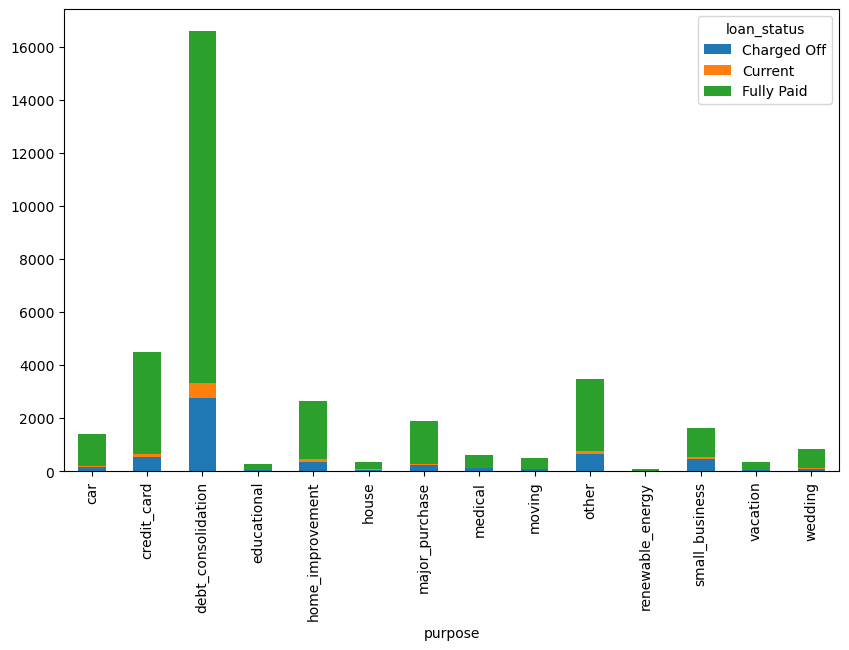

In [145]:
purpose_status.plot(kind='bar', stacked=True, figsize=[10,6])

#(kind="bar", stacked="True", figsize=[10,6])

Text(0.5, 0, 'Annual Income (Defaulters)')

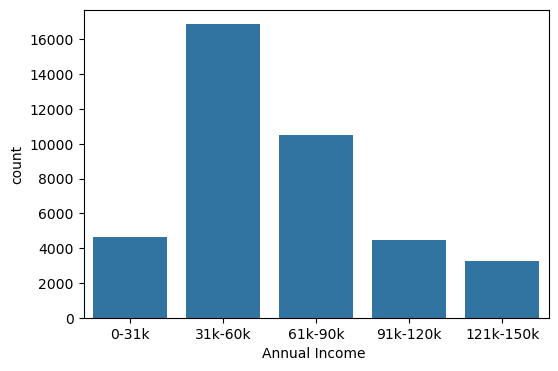

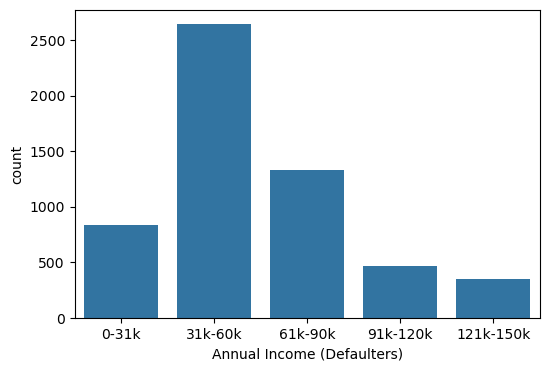

In [148]:
# Annual Income group

df['annual_income_group'] = pd.cut(df['annual_inc'], bins=[df['annual_inc'].min(),30000,60000,90000,120000,df['annual_inc'].max()],precision =0,labels =['0-31k','31k-60k','61k-90k','91k-120k','121k-150k'])

plt.figure(figsize=(6,4))
sns.countplot(x ='annual_income_group', data = df)
plt.xlabel('Annual Income ')

# Annual Income group - Defaulter

plt.figure(figsize=(6,4))
sns.countplot(x ='annual_income_group', data = df[df.loan_status == 'Charged Off'])
plt.xlabel('Annual Income (Defaulters)')

Text(0.5, 0, 'verification status (Defaulters)')

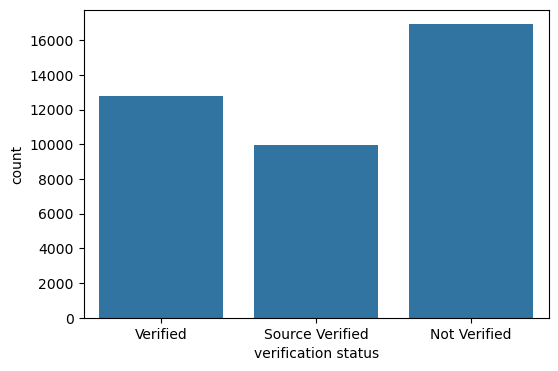

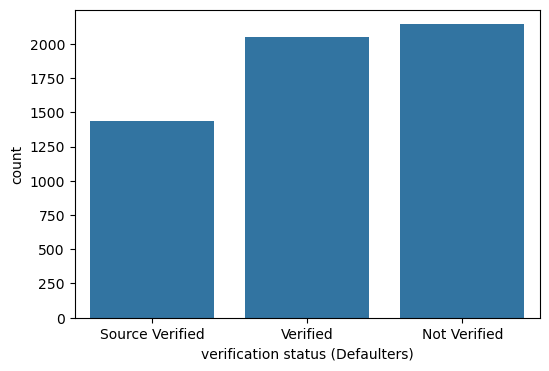

In [149]:
# Verification Status


plt.figure(figsize=(6,4))
sns.countplot(x ='verification_status', data = df)
plt.xlabel('verification status')

# Verification Status - Defaulter

plt.figure(figsize=(6,4))
sns.countplot(x ='verification_status', data = df[df.loan_status == 'Charged Off'])
plt.xlabel('verification status (Defaulters)')


### Bivariate Analysis of loan amount and loan status

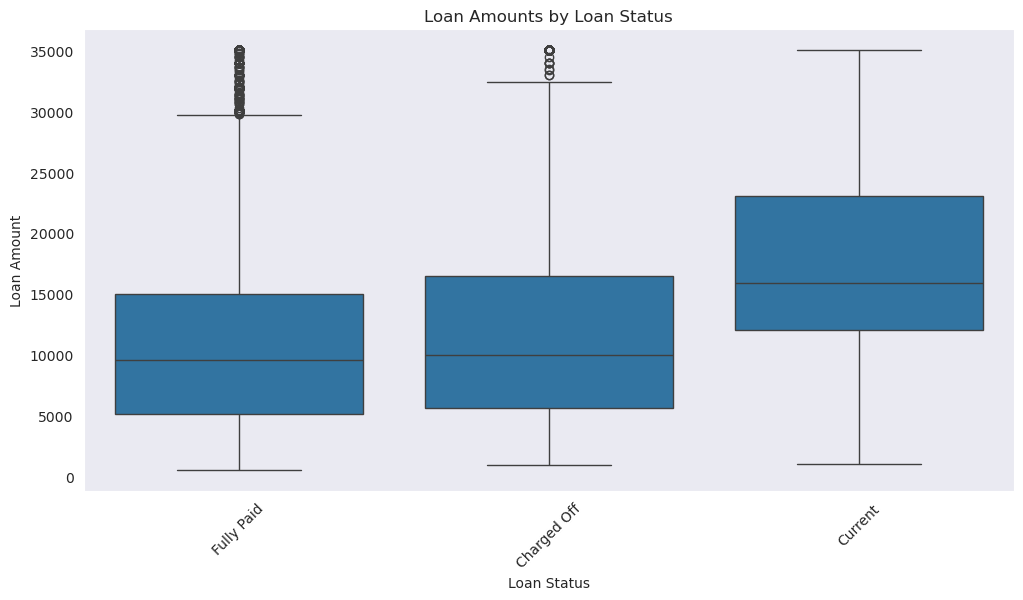

In [306]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df1)
plt.title('Loan Amounts by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

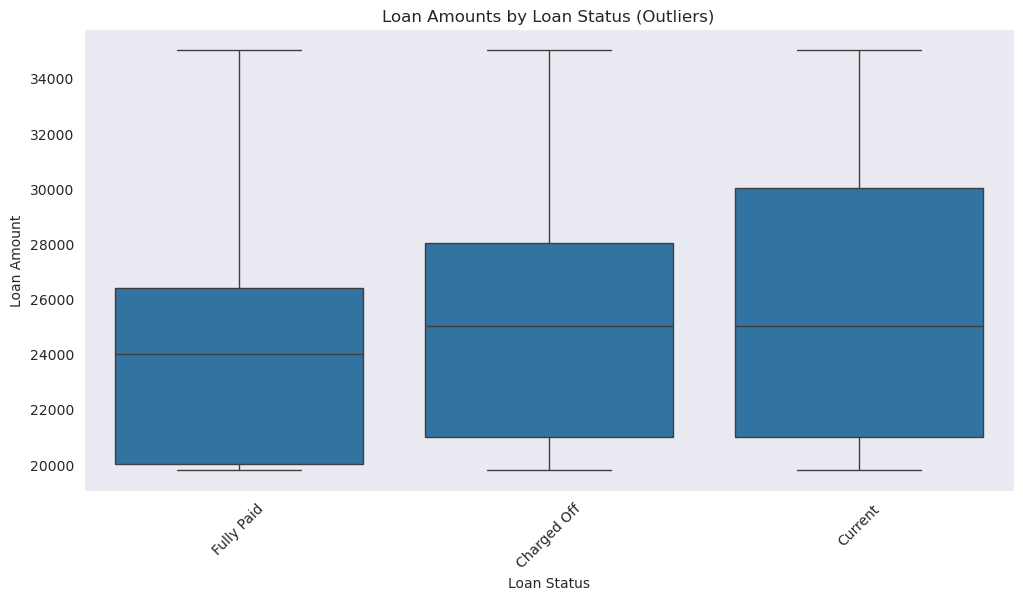

In [308]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=outliers)
plt.title('Loan Amounts by Loan Status (Outliers)')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

In [329]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, float('inf')]
labels = ['0-5k', '5-10k', '10-15k', '15-20k', '20-25k', '25-30k', '30-35k', '35k+']
df1['loan_amount_bin'] = pd.cut(df1['loan_amnt'], bins=bins, labels=labels)


loan_amount_status_bin = pd.pivot_table(data=df1, values="loan_amnt", index="loan_amount_bin", columns="loan_status", aggfunc='count')
loan_amount_status_bin

/tmp/ipykernel_233443/1314007379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan_amount_bin'] = pd.cut(df1['loan_amnt'], bins=bins, labels=labels)
/tmp/ipykernel_233443/1314007379.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  loan_amount_status_bin = pd.pivot_table(data=df1, values="loan_amnt", index="loan_amount_bin", columns="loan_status", aggfunc='count')


loan_status,Charged Off,Current,Fully Paid
loan_amount_bin,,,
0-5k,1307,96,7061
5-10k,1639,157,9465
10-15k,1051,302,5736
15-20k,747,242,3152
20-25k,540,163,1919
25-30k,143,85,548
30-35k,180,93,551
35k+,0,0,0


#### Mostly the loan amount falls under 5 to 10k
#### Loan amount highest defaults is 5 to 10k bin but percentagewise highest defaults are in 10 to 15k bin.
#### Overall it's better to go for the loan amount 5 tp 10 k since highest recovery is possible.
#### Better to keep upper cap of 25000 loan amount since Fully paid(p75) are mostly fall around 26000.

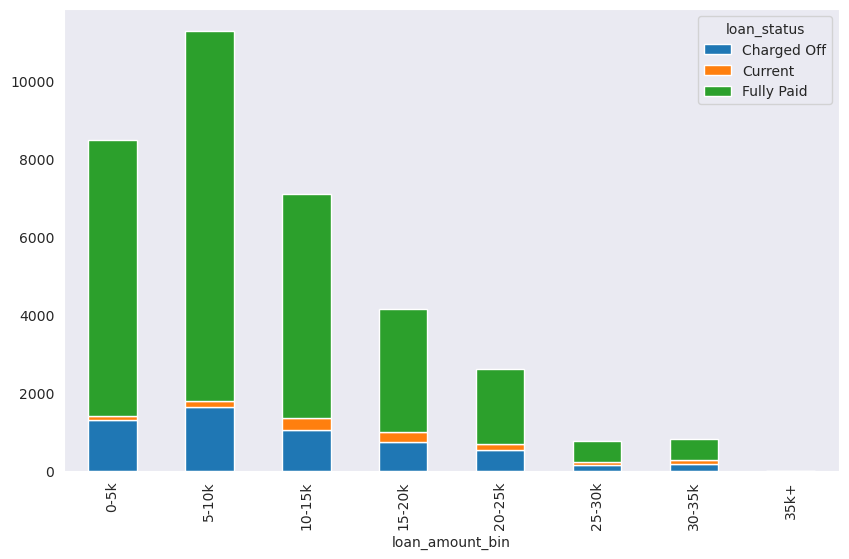

In [330]:
loan_amount_status_bin.plot(kind="bar", stacked="True", figsize=[10,6])

plt.show()

### Univariate analysis of installments

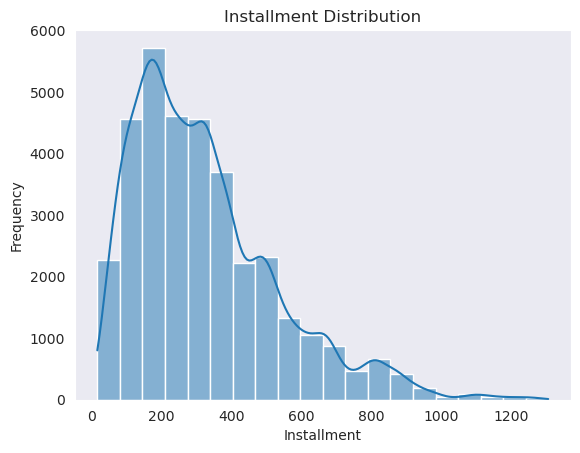

In [316]:
sns.histplot(df1['installment'], bins=20, kde=True)
plt.title('Installment Distribution')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

In [331]:
df1['installment'].describe()

count    35177.000000
mean       323.522987
std        209.141279
min         16.080000
25%        165.740000
50%        280.000000
75%        429.350000
max       1305.190000
Name: installment, dtype: float64

### Bivariate analysis wrt loan amount

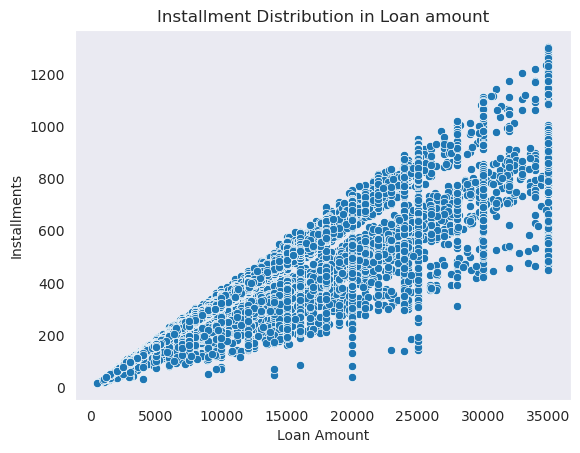

In [341]:
sns.scatterplot(data=df1, x='loan_amnt', y='installment')
plt.title('Installment Distribution in Loan amount')
plt.xlabel('Loan Amount')
plt.ylabel('Installments')
plt.show()

### Bivariate analysis wrt loan status

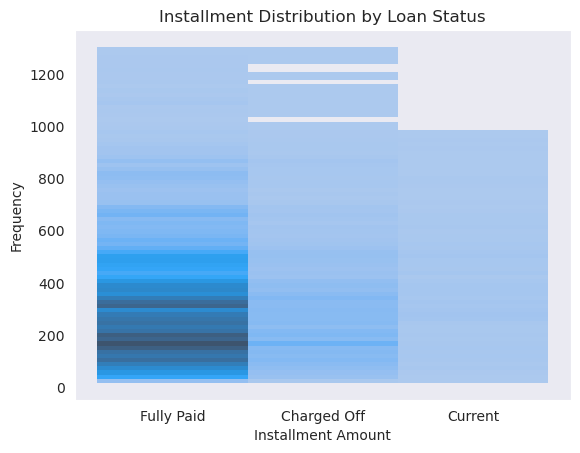

In [342]:
sns.histplot(data=df1, y='installment', x='loan_status', multiple='stack')
plt.title('Installment Distribution by Loan Status')
plt.xlabel('Installment Amount')
plt.ylabel('Frequency')
plt.show()

#### Installments are proposonal to loan amount
#### Most of the current installments are under 1000 which is good sign

### loan_status

In [355]:
df1['loan_status'].describe()

count          35177
unique             3
top       Fully Paid
freq           28432
Name: loan_status, dtype: object

In [357]:
df1['loan_status'].value_counts()

loan_status
Fully Paid     28432
Charged Off     5607
Current         1138
Name: count, dtype: int64

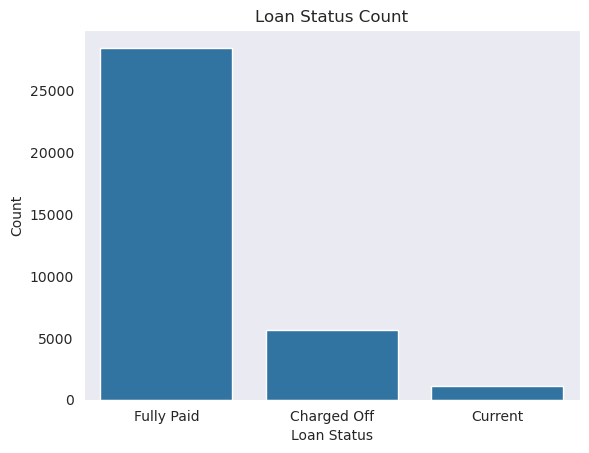

In [349]:
sns.countplot(x='loan_status', data=df1)
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

### Interest rate

In [361]:
df1['int_rate'].describe()

count    35177.000000
mean        12.091417
std          3.779658
min          5.420000
25%          9.250000
50%         11.860000
75%         14.650000
max         24.590000
Name: int_rate, dtype: float64

<Axes: ylabel='int_rate'>

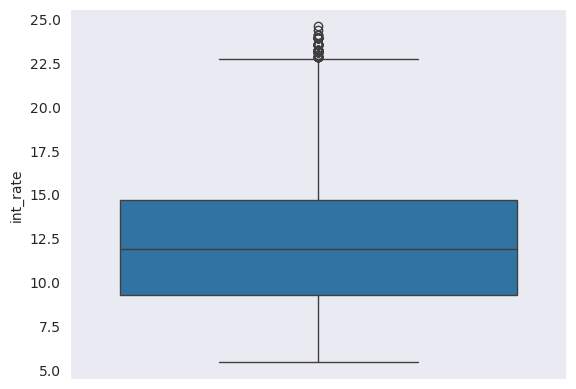

In [362]:
sns.boxplot(df1.int_rate)

In [366]:
# Find the outliers and understand the loan amt
p25 = df1['int_rate'].quantile(0.25)
p75 = df1['int_rate'].quantile(0.75)

IQR = p75 - p25
lower_range = p25 - IQR * 1.5
higher_range = p25 + IQR * 1.5

print(p25)
print(p75)
print(IQR)
print(lower_range)
print(higher_range)
outliers = df1[(df1['loan_amnt'] > higher_range) |  (df1['loan_amnt'] < lower_range)]
outliers['loan_status'].value_counts()

9.25
14.65
5.4
1.1499999999999986
17.35


loan_status
Fully Paid     28432
Charged Off     5607
Current         1138
Name: count, dtype: int64

In [373]:
outliers_defaults = outliers[outliers['loan_status'].isin(['Charged Off'])]
outliers_defaults['int_rate'].value_counts()



int_rate
11.49    127
13.49    127
10.99     95
11.71     91
11.99     76
        ... 
23.59      1
23.22      1
19.16      1
17.90      1
17.46      1
Name: count, Length: 330, dtype: int64

In [377]:
bins = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, float('inf')]
labels = ['0-2.5', '2.5-5', '5-7.5', '7.5-10', '10-12.5', '12.5-15', '15-17.5', '17.5-20', '20-22.5', '22.5-25', '25+']

df1['in_rate_bin'] = pd.cut(df1['int_rate'], bins=bins, labels=labels)


int_rate_status_bin = pd.pivot_table(data=df1, values="int_rate", index="in_rate_bin", columns="loan_status", aggfunc='count')
int_rate_status_bin

/tmp/ipykernel_233443/442573611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['in_rate_bin'] = pd.cut(df1['int_rate'], bins=bins, labels=labels)
/tmp/ipykernel_233443/442573611.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  int_rate_status_bin = pd.pivot_table(data=df1, values="int_rate", index="in_rate_bin", columns="loan_status", aggfunc='count')


loan_status,Charged Off,Current,Fully Paid
in_rate_bin,,,
0-2.5,0,0,0
2.5-5,0,0,0
5-7.5,255,5,4515
7.5-10,572,70,5512
10-12.5,1226,270,6949
12.5-15,1467,259,6156
15-17.5,1178,208,3453
17.5-20,613,224,1392
20-22.5,266,89,421


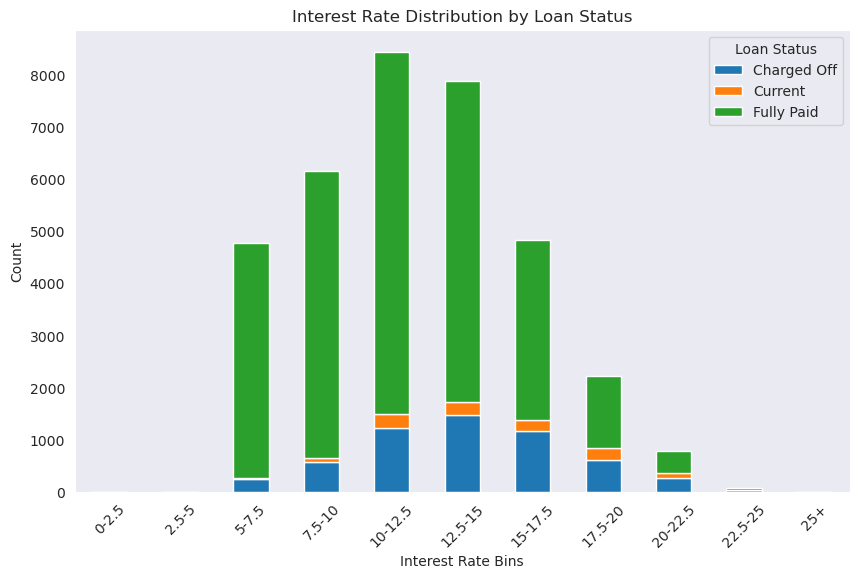

In [378]:
int_rate_status_bin.plot(kind="bar", stacked=True, figsize=[10, 6])

plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Interest Rate Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

#### Clearly int rate 15 to 17.5 bin have the hihest defaults
#### From the below heat map when the loan amount and interest rate are high occurance of defaults

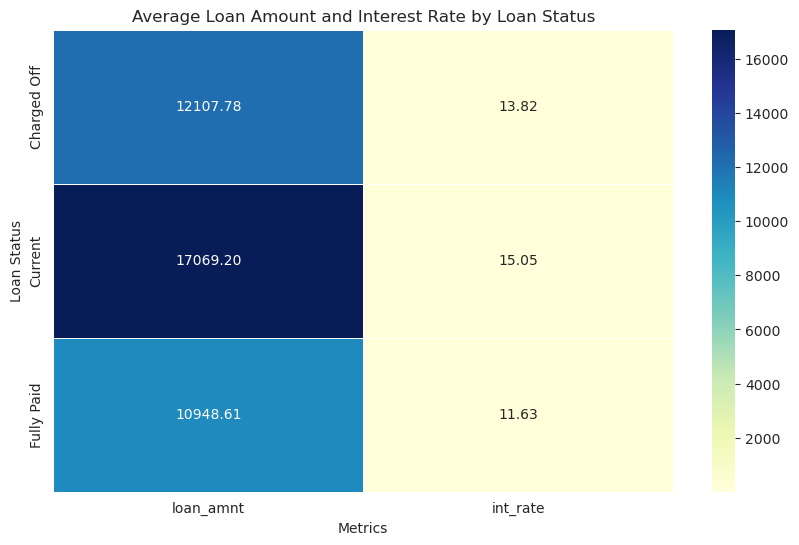

In [379]:
heatmap_data = df1.groupby('loan_status').agg({'loan_amnt': 'mean', 'int_rate': 'mean'}).reset_index()

heatmap_data.set_index('loan_status', inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Average Loan Amount and Interest Rate by Loan Status')
plt.xlabel('Metrics')
plt.ylabel('Loan Status')
plt.show()

### Above is the Multivariate analysis of loan status, loan amount and int rate

### Employment and emp_length

In [400]:
top_10_jobs = df1.emp_title.value_counts().sort_values(ascending=False).head(10).index
loan_status_distribution = df1[df1['emp_title'].isin(top_10_jobs)]
loan_status_distribution

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,expected_return,not_paid_amt,total_pymnt1,loan_amount_bin,in_rate_bin
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.0,NaN,NaN,NaN,NaN,5863.32,0.16,5863.16,0-5k,10-12.5
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.0,NaN,NaN,NaN,NaN,3035.88,30.21,3005.67,0-5k,15-17.5
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,...,0.0,NaN,NaN,NaN,NaN,9143.40,8497.38,646.02,5-10k,20-22.5
30,1032111,1261745,4375,4375,4375.0,36,7.51,136.11,A,A3,...,0.0,NaN,NaN,NaN,NaN,4899.96,0.00,4899.96,0-5k,7.5-10
42,1069314,1304202,3000,3000,3000.0,36,18.25,108.84,D,D5,...,0.0,NaN,NaN,NaN,NaN,3918.24,0.29,3917.95,0-5k,17.5-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39700,98276,98268,5400,5400,200.0,36,7.75,168.60,A,A3,...,0.0,NaN,NaN,NaN,NaN,6069.60,0.26,6069.34,5-10k,7.5-10
39704,93277,93254,3000,3000,950.0,36,8.70,94.98,B,B1,...,0.0,NaN,NaN,NaN,NaN,3419.28,0.14,3419.14,0-5k,7.5-10
39706,92676,92671,5000,5000,150.0,36,8.07,156.84,A,A4,...,0.0,NaN,NaN,NaN,NaN,5646.24,0.28,5645.96,0-5k,7.5-10
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,0.0,NaN,NaN,NaN,NaN,5646.24,374.08,5272.16,0-5k,7.5-10


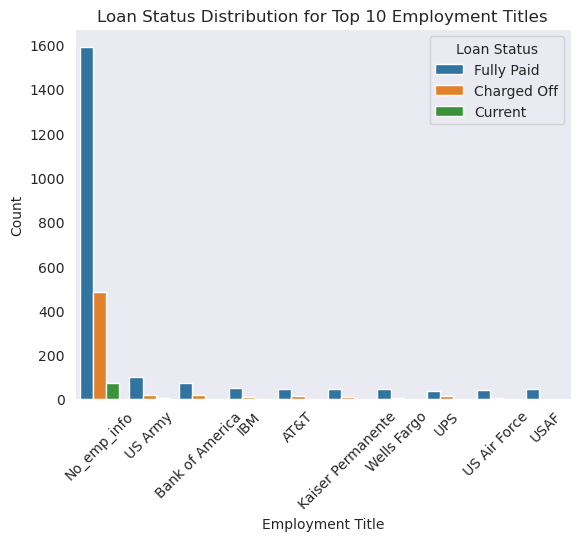

In [403]:
sns.countplot(data=loan_status_distribution, x='emp_title', hue='loan_status', order=top_10_jobs)
plt.title('Loan Status Distribution for Top 10 Employment Titles')
plt.ylabel('Count')
plt.xlabel('Employment Title')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

#### Analysis for grade and subgrades

In [407]:
print(df1['grade'].value_counts())
print(df1['sub_grade'].value_counts())


grade
B    10537
A     8943
C     7066
D     4711
E     2626
F      997
G      297
Name: count, dtype: int64
sub_grade
B3    2611
A4    2605
B5    2354
A5    2348
B4    2219
C1    1898
B2    1818
C2    1757
A3    1536
B1    1535
A2    1413
C3    1327
D2    1186
C4    1074
D3    1055
A1    1041
C5    1010
D4     896
D5     790
D1     784
E1     688
E2     609
E3     517
E4     426
E5     386
F1     312
F2     238
F3     175
F4     159
F5     113
G1      96
G2      75
G4      51
G3      48
G5      27
Name: count, dtype: int64


In [409]:
print(df1['grade'].unique())

['B' 'C' 'A' 'E' 'F' 'D' 'G']


In [410]:
print(df1['sub_grade'].unique())

['B2' 'C4' 'C5' 'B5' 'A4' 'E1' 'F2' 'C3' 'C1' 'B1' 'D1' 'A1' 'B4' 'B3'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


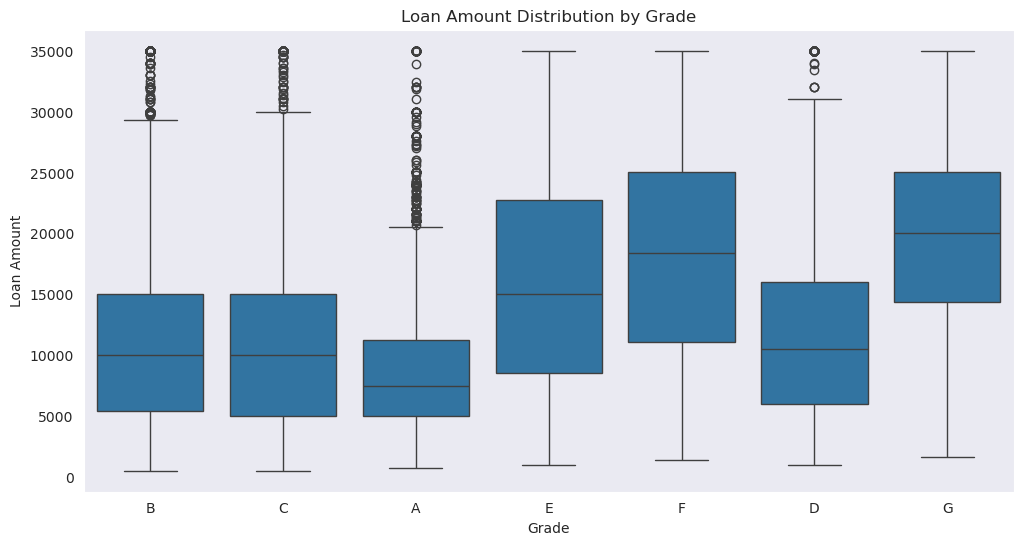

In [404]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='grade', y='loan_amnt')
plt.title('Loan Amount Distribution by Grade')
plt.ylabel('Loan Amount')
plt.xlabel('Grade')
plt.show()

In [ ]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc='count')

In [416]:

grades_bin = pd.pivot_table(data=df1, values="loan_amnt", index="grade", columns=["loan_status", "loan_amount_bin"], aggfunc='count')
grades_bin

/tmp/ipykernel_233443/2970976374.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  grades_bin = pd.pivot_table(data=df1, values="loan_amnt", index="grade", columns=["loan_status", "loan_amount_bin"], aggfunc='count')


loan_status     Charged Off                                                \
loan_amount_bin        0-5k 5-10k 10-15k 15-20k 20-25k 25-30k 30-35k 35k+   
grade                                                                       
A                       218   241    102     25      9      3      1    0   
B                       368   460    268    168    114     19     22    0   
C                       356   407    250    182    100     15     30    0   
D                       236   330    226    165    106     25     28    0   
E                       100   144    132    130    108     50     50    0   
F                        20    46     52     56     81     25     38    0   
G                         9    11     21     21     22      6     11    0   

loan_status     Current        ...             Fully Paid                      \
loan_amount_bin    0-5k 5-10k  ... 30-35k 35k+       0-5k 5-10k 10-15k 15-20k   
grade                          ...                                              
A                     7    10  ...      0    0       2531  3447   1562    500   
B                    28    46  ...     31    0       2163  2797   1848   1058   
C                    16    36  ...     13    0       1403  1713   1077    680   
D                    24    33  ...      7    0        674  1037    759    449   
E                    13    23  ...     21    0        226   362    344    320   
F                     7     7  ...     19    0         57    92    125    113   
G                     1     2  ...      2    0          7    17     21     32   

loan_status                                
loan_amount_bin 20-25k 25-30k 30-35k 35k+  
grade                                      
A                  150     64     50    0  
B                  650    138    119    0  
C                  410     79    100    0  
D                  299     75     80    0  
E                  234    120    129    0  
F                  112     55     52    0  
G                   64     17     21    0  

[7 rows x 24 columns]

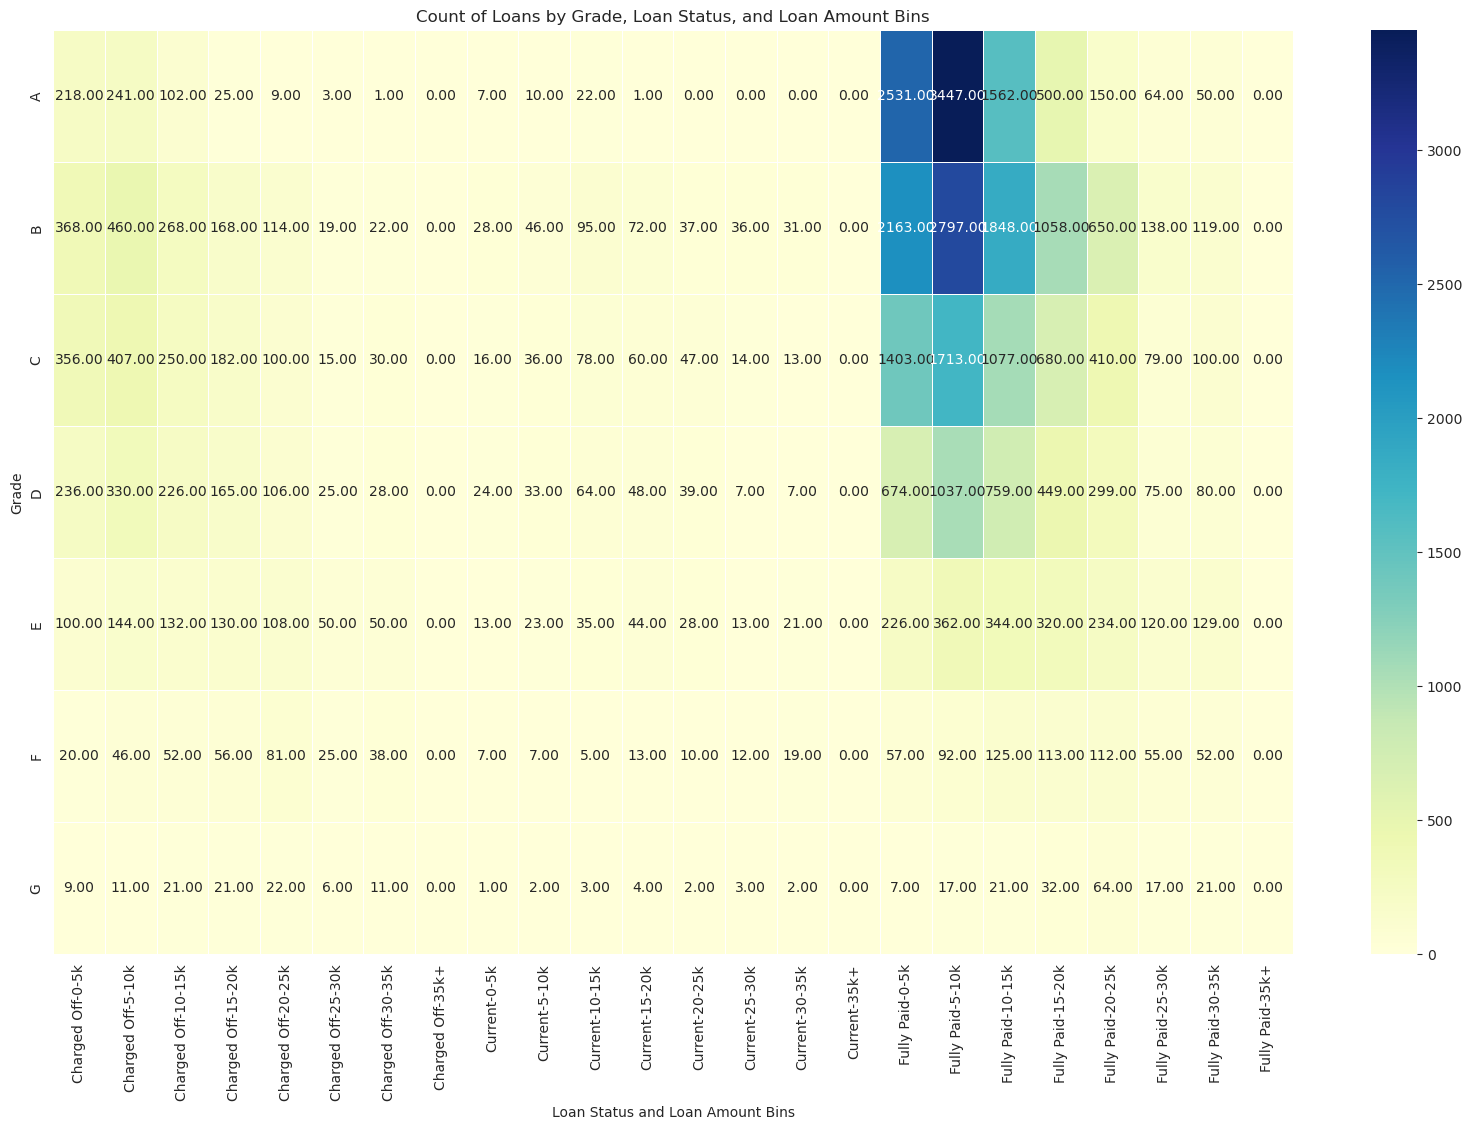

In [422]:
plt.figure(figsize=(20, 12))
sns.heatmap(grades_bin, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Count of Loans by Grade, Loan Status, and Loan Amount Bins')
plt.xlabel('Loan Status and Loan Amount Bins')
plt.ylabel('Grade')
plt.show()

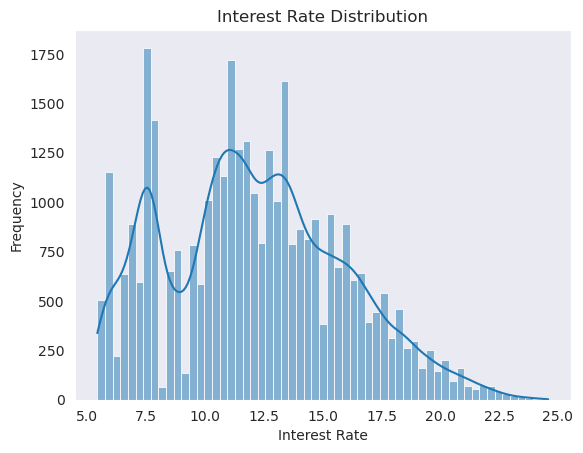

In [380]:
sns.histplot(df1['int_rate'], kde=True)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis

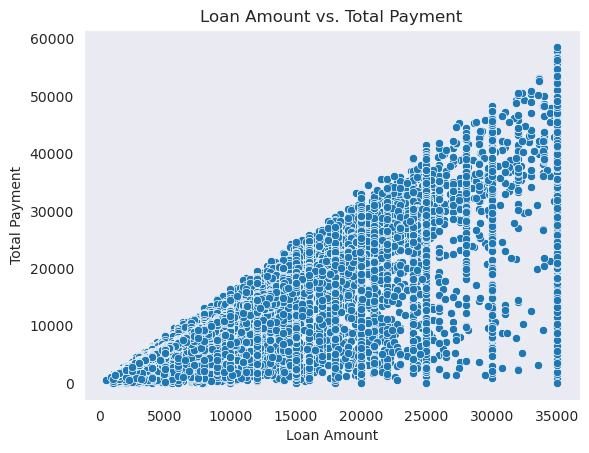

In [350]:
sns.scatterplot(x='loan_amnt', y='total_pymnt', data=df1)
plt.title('Loan Amount vs. Total Payment')
plt.xlabel('Loan Amount')
plt.ylabel('Total Payment')
plt.show()

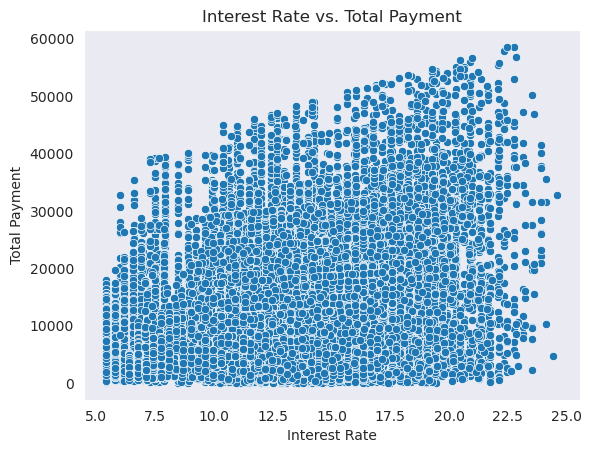

In [351]:
sns.scatterplot(x='int_rate', y='total_pymnt', data=df1)
plt.title('Interest Rate vs. Total Payment')
plt.xlabel('Interest Rate')
plt.ylabel('Total Payment')
plt.show()


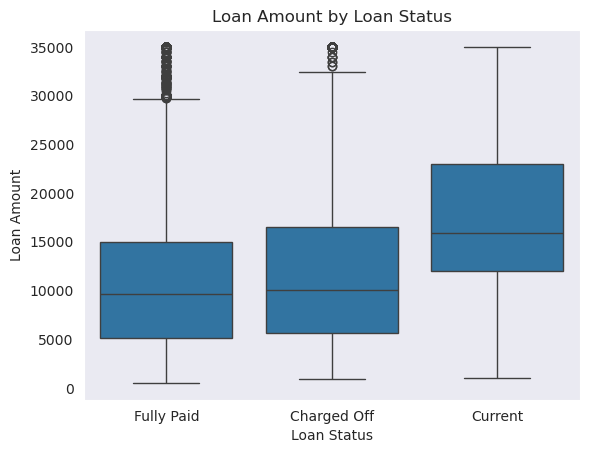

In [352]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df1)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

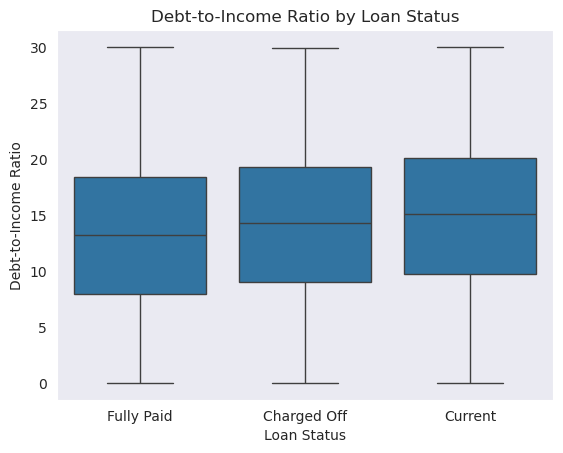

In [353]:
sns.boxplot(x='loan_status', y='dti', data=df1)
plt.title('Debt-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()